In [49]:
import pandas as pd
import numpy as np
import faiss
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

In [50]:
# load our full coffee data
data = pd.read_csv("../data/processed/preprocessed_data.csv")
# load model embeddings index 
index = faiss.read_index("../data/outputs/faiss/faiss_index.bin")
# load model embeddings
embeddings = np.load("../data/outputs/all_embeddings.npy")

print(type(embeddings)) 

<class 'numpy.ndarray'>


In [51]:
# center and normalize embeddings
scaler = StandardScaler()
normed_emb = scaler.fit_transform(embeddings)

In [52]:
start_time = time.time()


pca = PCA(n_components=2)
pc = pca.fit_transform(normed_emb)

end_time = time.time()

duration = end_time - start_time

print(f"PCA with sklearn took: {duration} seconds")

PCA with sklearn took: 0.05656147003173828 seconds


In [53]:
k_vals = [i for i in range(2, 21)]
best_k = 2
best_sil_score = -1.
sil_scores = {}
X = normed_emb
for k in k_vals:
    print(f"Running {k}-Means")
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, cluster_labels)
    sil_scores[k] = sil_score
    print(f"For k = {k}, Silhouette Score: {sil_score}")
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k
        
print(best_k)
print(best_sil_score)

Running 2-Means
For k = 2, Silhouette Score: 0.1414176970720291
Running 3-Means
For k = 3, Silhouette Score: 0.15826880931854248
Running 4-Means
For k = 4, Silhouette Score: 0.16839417815208435
Running 5-Means
For k = 5, Silhouette Score: 0.14054717123508453
Running 6-Means
For k = 6, Silhouette Score: 0.12431493401527405
Running 7-Means
For k = 7, Silhouette Score: 0.13228529691696167
Running 8-Means
For k = 8, Silhouette Score: 0.1478264182806015
Running 9-Means
For k = 9, Silhouette Score: 0.16195979714393616
Running 10-Means
For k = 10, Silhouette Score: 0.16487032175064087
Running 11-Means
For k = 11, Silhouette Score: 0.16526541113853455
Running 12-Means
For k = 12, Silhouette Score: 0.1513928323984146
Running 13-Means
For k = 13, Silhouette Score: 0.15984489023685455
Running 14-Means
For k = 14, Silhouette Score: 0.16360755264759064
Running 15-Means
For k = 15, Silhouette Score: 0.17127537727355957
Running 16-Means
For k = 16, Silhouette Score: 0.15730123221874237
Running 17-Mea

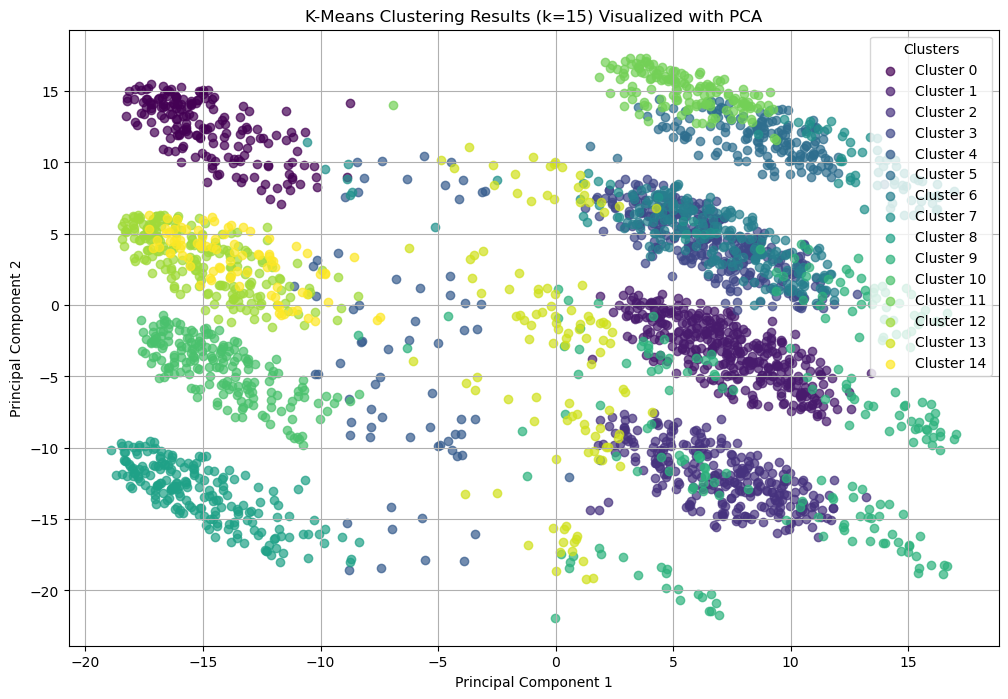

In [57]:

final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_clusters = final_kmeans.fit_predict(normed_emb)

# reduce dimenstionality for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(normed_emb)

plt.figure(figsize=(12, 8))

unique_labels = np.unique(final_clusters)
# Generate an array of distinct colors
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    # Select the 2D points belonging to the current cluster
    cluster_points = embeddings_2d[final_clusters == label]
    
    # Plot the points for the current cluster, assign unique color and label
    plt.scatter(
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        color=colors[i], 
        label=f'Cluster {label}', 
        alpha=0.7
    )


plt.title(f'K-Means Clustering Results (k={best_k}) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Clusters") 
plt.grid(True)
plt.show();